# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from adjustText import adjust_text

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        response.raise_for_status()  # Will raise an HTTPError if the HTTP request returned an unsuccessful status code
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuren-haebaru
Processing Record 2 of Set 1 | bodaybo
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | victorica
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | zaozersk
Processing Record 8 of Set 1 | basciftlik
Processing Record 9 of Set 1 | vargashi
Processing Record 10 of Set 1 | uturoa
Processing Record 11 of Set 1 | lihue
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | laminusa
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | afaahiti
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | vilyuchinsk
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | isangel
Processing Record 20 of Set 1 | bubaque
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 1 | wailua homesteads
Proce

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,katsuren-haebaru,26.3369,127.8719,30.01,88,20,3.09,JP,1721068470
1,bodaybo,57.8506,114.1933,15.16,92,99,0.60,RU,1721068471
2,bredasdorp,-34.5322,20.0403,10.74,87,84,0.97,ZA,1721068472
3,victorica,-36.2151,-65.4359,13.99,28,0,9.19,AR,1721068474
4,new norfolk,-42.7826,147.0587,11.62,99,99,1.28,AU,1721068475


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,katsuren-haebaru,26.3369,127.8719,30.01,88,20,3.09,JP,1721068470
1,bodaybo,57.8506,114.1933,15.16,92,99,0.60,RU,1721068471
2,bredasdorp,-34.5322,20.0403,10.74,87,84,0.97,ZA,1721068472
3,victorica,-36.2151,-65.4359,13.99,28,0,9.19,AR,1721068474
4,new norfolk,-42.7826,147.0587,11.62,99,99,1.28,AU,1721068475


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

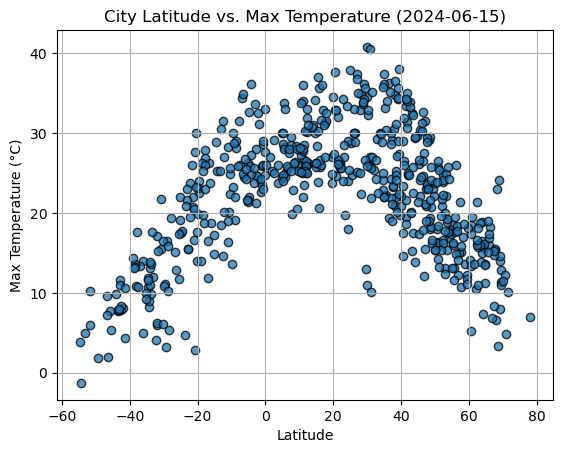

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='k', alpha=0.75)

# Incorporate the other graph properties
# plt.figure(figsize=(10, 6))

plt.title('City Latitude vs. Max Temperature (2024-06-15)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

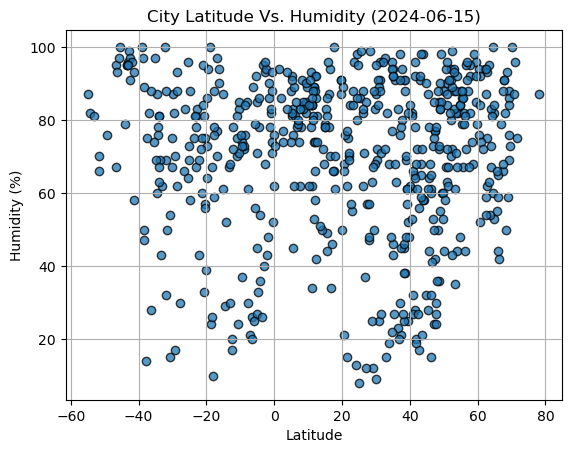

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='k', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude Vs. Humidity (2024-06-15)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

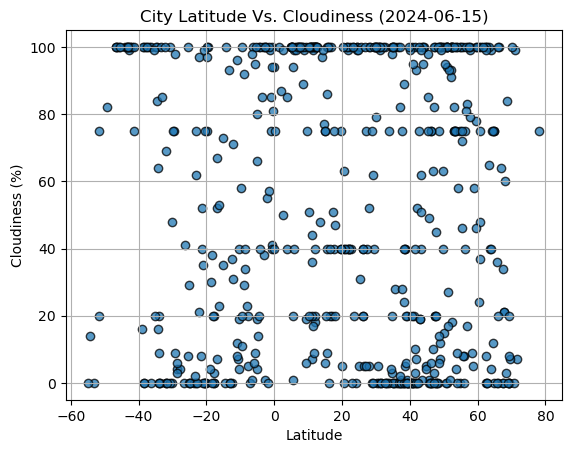

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='k', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude Vs. Cloudiness (2024-06-15)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

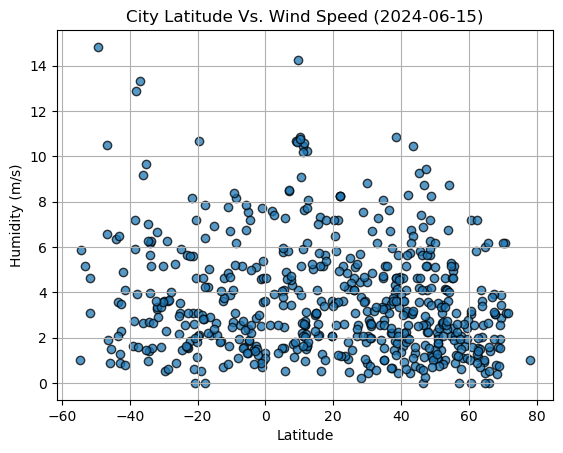

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='k', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude Vs. Wind Speed (2024-06-15)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title):
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    regression_values = slope * x_values + intercept

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_values, color='r')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    text = plt.text(0.03, 0.03, f'y = {slope:.2f}x + {intercept:.2f}', color='red', fontsize=15, transform=plt.gca().transAxes)
    adjust_text([text])
    print(f'The r^2-value is: {r_value**2}')
    plt.show()

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,katsuren-haebaru,26.3369,127.8719,30.01,88,20,3.09,JP,1721068470
1,bodaybo,57.8506,114.1933,15.16,92,99,0.60,RU,1721068471
6,zaozersk,69.4005,32.4476,11.41,88,0,2.87,RU,1721068477
7,basciftlik,40.5469,37.1692,14.61,82,100,1.61,TR,1721068479
8,vargashi,55.3556,65.8467,16.03,86,72,4.92,RU,1721068480


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bredasdorp,-34.5322,20.0403,10.74,87,84,0.97,ZA,1721068472
3,victorica,-36.2151,-65.4359,13.99,28,0,9.19,AR,1721068474
4,new norfolk,-42.7826,147.0587,11.62,99,99,1.28,AU,1721068475
5,papatowai,-46.5619,169.4708,9.61,95,100,6.57,NZ,1721068476
9,uturoa,-16.7333,-151.4333,26.30,77,7,5.03,PF,1721068481


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.40032456960792157


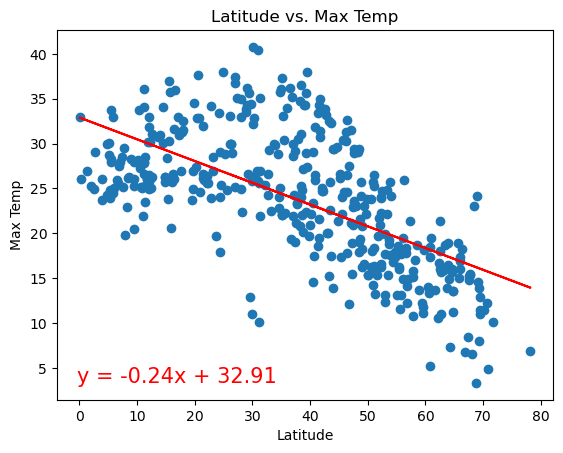

In [37]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Max Temp'],
    'Latitude',
    'Max Temp',
    'Latitude vs. Max Temp',
)

The r^2-value is: 0.6761457707483378


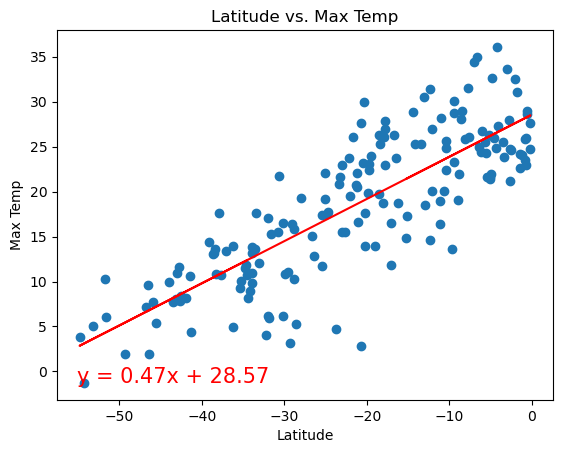

In [38]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Max Temp'],
    'Latitude',
    'Max Temp',
    'Latitude vs. Max Temp',
)

**Discussion about the linear relationship:** 

Hemisferio Norte: The maximum temperature decreases with increasing latitude.
Hemisferio Sur: The maximum temperature increases with increasing latitude (approaching the equator).

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.00019221520762560752


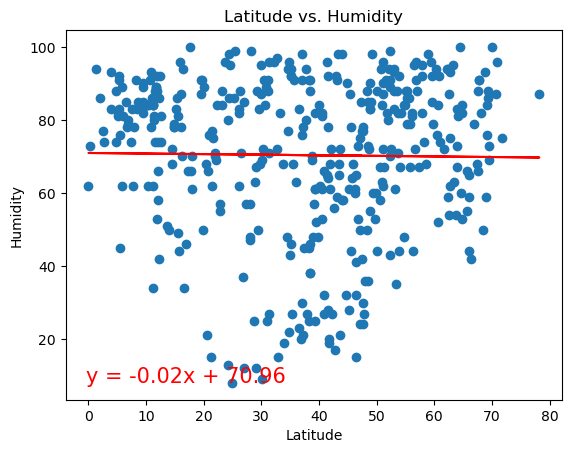

In [41]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'],
    'Latitude',
    'Humidity',
    'Latitude vs. Humidity',
)

The r^2-value is: 0.047677121626746526


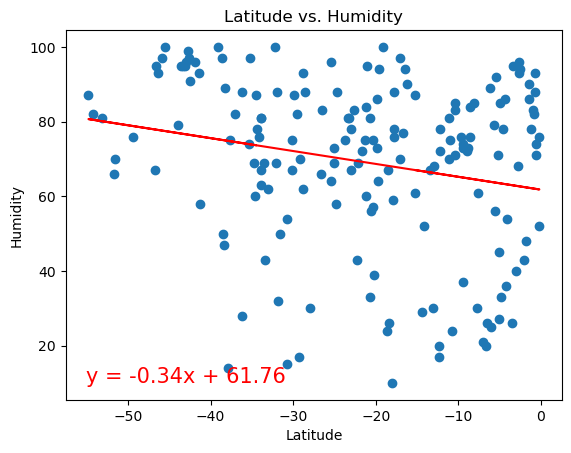

In [42]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'],
    'Latitude',
    'Humidity',
    'Latitude vs. Humidity',
)

**Discussion about the linear relationship:** 

Hemisferio Norte: Humidity slightly decreases with increasing latitude.
Hemisferio Sur: Humidity decreases more significantly with increasing latitude (approaching the equator).

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.031938244995104656


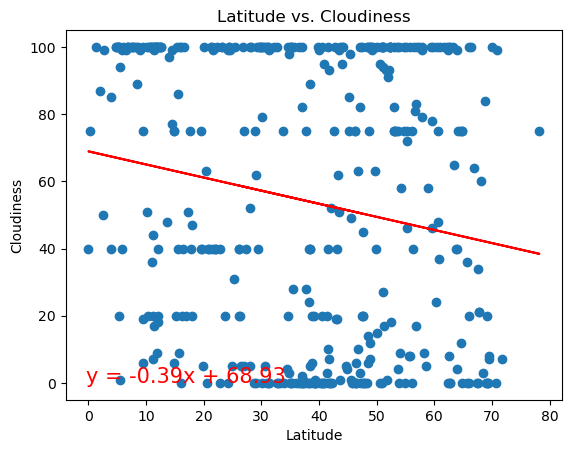

In [54]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'],
    'Latitude',
    'Cloudiness',
    'Latitude vs. Cloudiness',
)

The r^2-value is: 0.007483593101406048


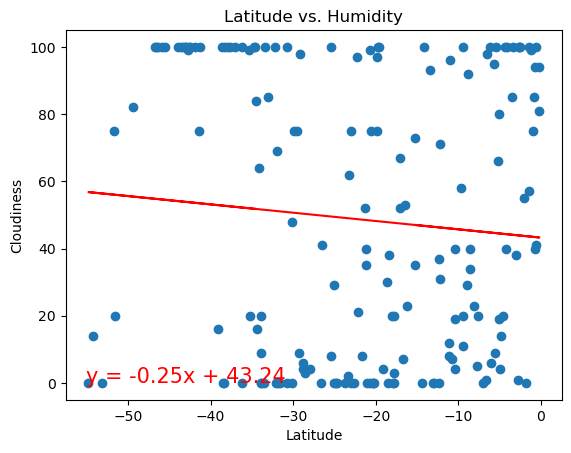

In [55]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    'Latitude',
    'Cloudiness',
    'Latitude vs. Humidity',
)

**Discussion about the linear relationship:** 

Hemisferio Norte: Cloudiness decreases with increasing latitude.
Hemisferio Sur: Cloudiness decreases with increasing latitude, but the effect is less pronounced than in the northern hemisphere.


### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.07767918862225842


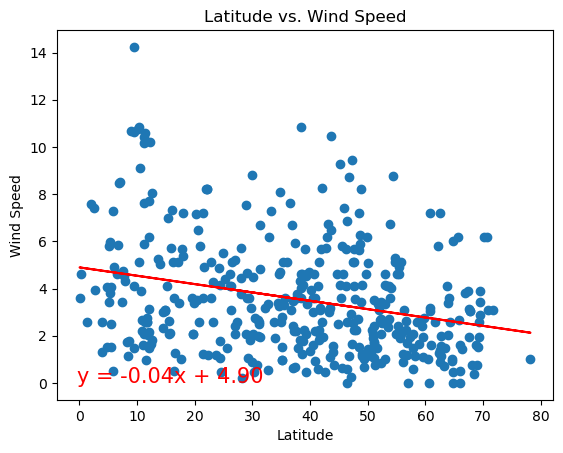

In [60]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'],
    'Latitude',
    'Wind Speed',
    'Latitude vs. Wind Speed',
)

The r^2-value is: 0.031832809203286495


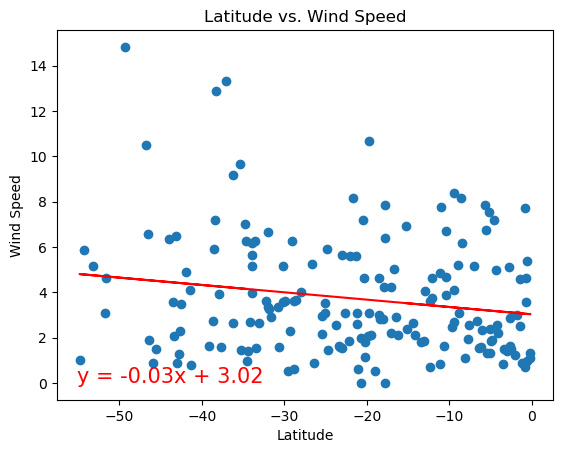

In [58]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Wind Speed'],
    'Latitude',
    'Wind Speed',
    'Latitude vs. Wind Speed',
)

**Discussion about the linear relationship:** 

Northern Hemisphere: Wind speed slightly decreases with increasing latitude.
Southern Hemisphere: Wind speed slightly decreases with increasing latitude.